In [3]:
from keras.layers import Input, Dense
from keras.models import Model

In [4]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [5]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [6]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Scaling data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 4s 1us/step


In [8]:
#Fitting the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.5287 - accuracy: 0.4490 - val_loss: 0.4550 - val_accuracy: 0.4825
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.4225 - accuracy: 0.4886 - val_loss: 0.4042 - val_accuracy: 0.4885
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3927 - accuracy: 0.4925 - val_loss: 0.3846 - val_accuracy: 0.4922
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3748 - accuracy: 0.4954 - val_loss: 0.3689 - val_accuracy: 0.4941
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3608 - accuracy: 0.4975 - val_loss: 0.3567 - val_accuracy: 0.4961


In [9]:
#predicting test data
pred = autoencoder.predict(x_test)

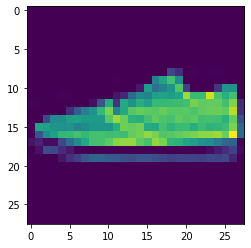

In [32]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[60].reshape(28,28))
plt.show()

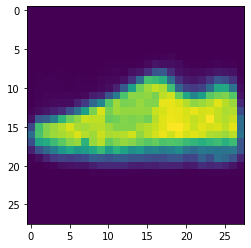

In [33]:
#reconstructed Image
plt.imshow(pred[60].reshape(28,28))
plt.show()

1. . Add one more hidden layer to autoencoder

In [13]:
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_encoded=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_encoded)
#Adding hidden layer
hiddenLayer_dense=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_dense)

In [14]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [16]:
#Fitting the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.4845 - accuracy: 0.4607 - val_loss: 0.3924 - val_accuracy: 0.4901
Epoch 2/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3769 - accuracy: 0.4931 - val_loss: 0.3642 - val_accuracy: 0.4927
Epoch 3/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3539 - accuracy: 0.4978 - val_loss: 0.3457 - val_accuracy: 0.5009
Epoch 4/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3371 - accuracy: 0.5010 - val_loss: 0.3389 - val_accuracy: 0.4954
Epoch 5/5
60000/60000 [==============================] - 10s 170us/step - loss: 0.3285 - accuracy: 0.5022 - val_loss: 0.3274 - val_accuracy: 0.5025


In [18]:
#predicting test data
pred = autoencoder.predict(x_test)

2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstructionusing 

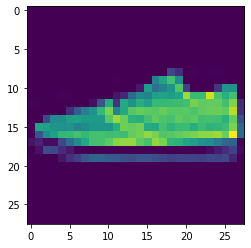

In [34]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[60].reshape(28,28))
plt.show()

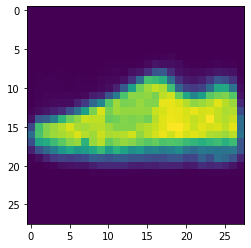

In [35]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(pred[60].reshape(28,28))
plt.show()

3. Repeat the question 2 on the denoisening autoencoder

In [21]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [22]:
#Fitting the model
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.3294 - accuracy: 0.5020 - val_loss: 0.3134 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.3256 - accuracy: 0.5024 - val_loss: 0.3101 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3234 - accuracy: 0.5027 - val_loss: 0.3082 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.3216 - accuracy: 0.5030 - val_loss: 0.3077 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.3202 - accuracy: 0.5032 - val_loss: 0.3043 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.3188 - accuracy: 0.5034 - val_loss: 0.3021 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [========

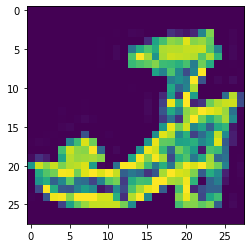

In [36]:
#Image before applying noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[60].reshape(28,28))
plt.show()

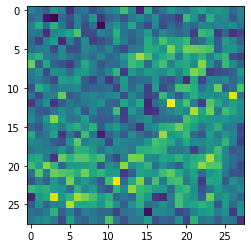

In [38]:
#Image after applying noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[60].reshape(28,28))
plt.show()

In [25]:
#predicting test data
pred = autoencoder.predict(x_test_noisy) 

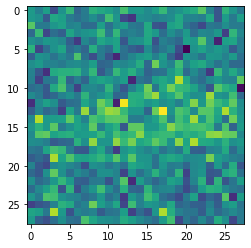

In [39]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[60].reshape(28,28))
plt.show()

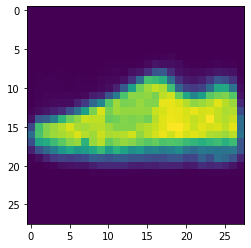

In [40]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(pred[60].reshape(28,28))
plt.show()

4. plot lossand accuracy using the history object

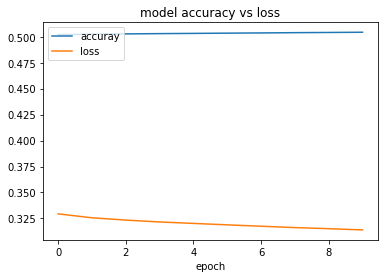

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

BONUS:  1.Visualize the compressed version of the input data in

In [29]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#Setting up width and height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
encoded_images = encoder.predict(x_test[[2],:])

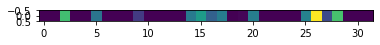

In [31]:
from matplotlib import pyplot as plt
plt.imshow(encoded_images)
plt.show()